Rodney Bongcaron <br>
D209 Data Mining I <br>
October 26 2021

<h2 style="text-align:center">Performance Assessment: Data Mining I</h2>
<h2 style="text-align:center">Classification Analysis</h2>

### Part I: Research Question
#### A. Describe the purpose of this data mining report
1. Can we determine if a customer will churn or not by customer satisfaction? Using k-nearest neighbor (KNN) will be used in this analysis.
2. The objective of the analysis is to find which type of customers will most likely churn by analyzing satisfaction. Knowing this information the business can cater more of their resources for those customers.

### Part II: Method Justifcation
#### B. Explain the reasons for your chosen classification method
1. The K-nearest neighbors works by observing a data point, and groups that data point by it's surrounding 'neighbors'. By just looking at the data of customers who churn, more than 70 percent do not churn. Going by this information, the expected outcome will be that customers will most likely not churn.
2. One assumption of K-nearest neighbors is that, data points that are near each other are similar (Grant, P., 2019, July 21).
3. List of packages:
    -  Pandas
    - Random
    - matplotlib
    - Scikit learn (sklearn)

Pandas used for importing and manipulating the data. Random to generate random data to test. Matplotlib for descriptive graphs and plots. Sklearn, using the built-in K-nearest neighbor for perform the analysis.

### Part III: Data Preparation 
#### C. Data preparation for the chosen data set
1. One data preprocessing that I will do is convert the Churn variable values from categorical values to numeric values (e.g yes/no to 1/0).
2. The variables used for the analysis are Churn and the survey variables Item1 - Item8. Both variables are categorical. Churn being a binary data and survey variables being ordinal data.
3. The steps taken to prepare the data for analysis were
    - Read the clean dataset to a dataframe.
    - Select only the variables needed for the analysis.
    - Change the survey items names to a more meaningful name.
    - Create a smaller dataframe with only those variables.
    - Perform the analysis by splitting the data into training and test data sets
    - Analysis the result
    



In [15]:
import pandas as pd

In [16]:
# importing churn data
df = pd.read_csv("data/churn_clean.csv")

In [17]:
# Only using the necessary variables for analysis
df = df[['Churn',
         'Item1',
         'Item2',
         'Item3',
         'Item4',
         'Item5',
         'Item6',
         'Item7',
         'Item8'
       ]]

# Renaming the survey item variables to be more readable
df.rename(columns={'Item1' : 'Timely_response'}, inplace=True)
df.rename(columns={'Item2' : 'Timely_fixes'}, inplace=True)
df.rename(columns={'Item3' : 'Timely_replacement'}, inplace=True)
df.rename(columns={'Item4' : 'Reliability'}, inplace=True)
df.rename(columns={'Item5' : 'Options'}, inplace=True)
df.rename(columns={'Item6' : 'Respectful_response'}, inplace=True)
df.rename(columns={'Item7' : 'Courteous_exchange'}, inplace=True)
df.rename(columns={'Item8' : 'Evidence_of_active_listening'}, inplace=True)

In [18]:
# encoding the categorical values to numeric values
encoding = {"Churn": {"No": 0, "Yes": 1 }}
df.head()

Churn  Timely_response  Timely_fixes  Timely_replacement  Reliability  \
0    No                5             5                   5            3   
1   Yes                3             4                   3            3   
2    No                4             4                   2            4   
3    No                4             4                   4            2   
4   Yes                4             4                   4            3   

   Options  Respectful_response  Courteous_exchange  \
0        4                    4                   3   
1        4                    3                   4   
2        4                    3                   3   
3        5                    4                   3   
4        4                    4                   4   

   Evidence_of_active_listening  
0                             4  
1                             4  
2                             3  
3                             3  
4                             5

In [19]:
df = df.replace(encoding)
df.head()

Churn  Timely_response  Timely_fixes  Timely_replacement  Reliability  \
0      0                5             5                   5            3   
1      1                3             4                   3            3   
2      0                4             4                   2            4   
3      0                4             4                   4            2   
4      1                4             4                   4            3   

   Options  Respectful_response  Courteous_exchange  \
0        4                    4                   3   
1        4                    3                   4   
2        4                    3                   3   
3        5                    4                   3   
4        4                    4                   4   

   Evidence_of_active_listening  
0                             4  
1                             4  
2                             3  
3                             3  
4                             5

4. Exporting dataset

In [20]:
 prepared_data = df.to_csv('prepared_data.csv')

### Part IV: Analysis
#### D. Data analysis and report on the results 

1. Analysis

In [23]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier as KNC
import random as rd
from sklearn.model_selection import train_test_split as tts


# Create arrays for the features and the response variable
y = df['Churn'].values
X = df.drop('Churn', axis=1).values

# Create a k-NN classifier with 7 neighbors: knn
knn = KNC(n_neighbors=7)

# Fit the classifier to the data
knn.fit(X,y)

# Predict the labels for the training data X
y_pred = knn.predict(X)

# Creating new data points
X_new = np.empty((0, 8), int)
for idx in range(10):
    X_new = np.append(X_new, np.array([[rd.randrange(1, 9),
                                        rd.randrange(1, 9), 
                                        rd.randrange(1, 9), 
                                        rd.randrange(1, 9), 
                                        rd.randrange(1, 9), 
                                        rd.randrange(1, 9), 
                                        rd.randrange(1, 9), 
                                        rd.randrange(1, 9)]]), axis=0)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

# Counting the freqency
pd.DataFrame(new_prediction, columns = ['prediction']).value_counts()

Prediction: [0 0 0 0 0 0 0 0 0 0]


prediction
0             10
dtype: int64

In [42]:
# Split into training and test set
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state=42, stratify=y)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print("Accuracy:",knn.score(X_test, y_test))


Accuracy: 0.701


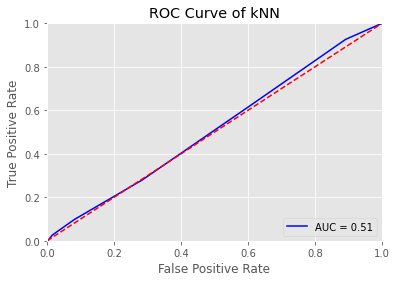

In [261]:
# Calculating the area under the curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

In [262]:
# Converting train and test data to dataframes and exporting to csv files
train = pd.DataFrame(X_train, columns = df.columns[1:])
train.insert(loc = 0, column = 'Churn', value = y_train)
export_train = df.to_csv('train_data.csv')
                         
test = pd.DataFrame(X_test, columns = df.columns[1:])
test.insert(loc = 0, column = 'Churn', value = y_test)
export_test = df.to_csv('test_data.csv')

2. The analysis I used was the K-nearest neighbor (KNN) algorithm. What the KNN does is that it labels the data point via its surrounding neighbors. For example, to classify a data point as Yes or No on churn. Whichever is the majority answer that surrounds that data point, is then labeled as that answer. Thus, lets us predict whether a customer will churn or not.  
<br>
3. Code provided above

### Part V: Data Summary and Implications
#### E. Summary

1. The accuracy of the model came out to be 70 percent and the area under the curve score is 0.51.
2. The result of the model being 70 percent, there is a higher chance that the customers will not churn. However, with a AUC score of 0.51, meaning that the model has a difficulty distinguishing between positive class and negative class (Narkhede, S., 2021, June 15)
3. One limitation of K-nearest neighbor is the optimal number of neighbors that are needed when classifying the new data (Genesis, 2018, September 25).
4. Result of the survey showed that 70 percent of customers will not churn. Showing that customer satisfaction is still a huge factor in customer retention. Organization action's should improve customer support and satisfaction overall.

<h2 style="text-align:center">References</h2><br>

Grant, P. (2019, July 21). Introducing K-nearest neighbors. Medium. Retrieved November 6, 2021, from <br>
<span style="margin-left:2em">https://towardsdatascience.com/introducing-k-nearest-neighbors-7bcd10f938c5. </span>


Supervised learning: Python. campus.datacamp.com. (n.d.). Retrieved November 8, 2021, from <br>
<span style="margin-left:2em">https://campus.datacamp.com/courses/supervised-learning-with-scikit-learn/classification?ex=1. </span>

Split data into testing and training and convert to csv or excel files. (2020, July 23). Stack Overflow. Retrieved November 8, 2021, from 
<span style="margin-left:2em">https://stackoverflow.com/questions/63054593/split-data-into-testing-and-training-and-convert-to-csv-or-excel-files</span>

How to Convert NumPy Array to Pandas DataFrame. (2021, July 16). Data to Fish. Retrieved November 8, 2021, from <br><span style="margin-left:2em">https://datatofish.com/numpy-array-to-pandas-dataframe/</span>

Python Random randrange() Method. (n.d.). Python Random Randrange() Method. Retrieved November 8, 2021, from <span style="margin-left:2em">https://www.w3schools.com/python/ref_random_randrange.asp</span>

Create an empty 2D Numpy Array / matrix and append rows or columns in python – thispointer.com. (n.d.). Create an Empty 2D Numpy Array / Matrix and 
<span style="margin-left:2em">Append Rows or Columns. Retrieved November 8, 2021, from</span> <br>
<span style="margin-left:2em">https://thispointer.com/create-an-empty-2d-numpy-array-matrix-and-append-rows-or-columns-in-python/</span>

Insert Column at Specific Position of pandas DataFrame (Python Example). (2021, July 8). Statistics Globe. Retrieved November 8, 2021, from <br>
<span style="margin-left:2em">https://statisticsglobe.com/insert-column-at-specific-position-of-pandas-dataframe-in-python</span>

Implementing ROC Curves for K-NN machine learning algorithm using python and Scikit Learn. (2018, October 20). <br><span style="margin-left:2em">Stack Overflow. Retrieved November 9, 2021, from</span> <br>
<span style="margin-left:2em">https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-sci</span>

Narkhede, S. (2021, June 15). Understanding AUC - ROC Curve - Towards Data Science. <br>
<span style="margin-left:2em">Medium. Retrieved November 9, 2021, from https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5</span>

Genesis. (2018, September 25). Pros and Cons of K-Nearest Neighbors - <br>
<span style="margin-left:2em">From The GENESIS. From the GENESIS. https://www.fromthegenesis.com/pros-and-cons-of-k-nearest-neighbors/</span>